In [28]:
#!pip install openai


In [29]:
import openai

In [30]:
import os

In [34]:
openai.api_key = os.getenv('OPENAI_API_KEY')

In [35]:
def create_dish_prompt(list_of_ingredients):
    prompt = f"Create a detailed recipe based on only following ingredents : {', '.join(list_of_ingredients)}.\n"\
            +f"Additionally, assign a title starting with 'Recipe Title:' to this recipe."
    
    return prompt

In [36]:
i = ['eggs','bread','cheese','butter']

In [37]:
print(create_dish_prompt(i))

Create a detailed recipe based on only following ingredents : eggs, bread, cheese, butter.
Additionally, assign a title starting with 'Recipe Title:' to this recipe.


In [38]:
response = openai.Completion.create(engine='text-davinci-003',
                                    prompt = recipe,
                                    max_tokens = 512,
                                    temperature = 0.7)
                                    

In [39]:
print(response['choices'][0]['text'])



Recipe Title: Delicious Cheese Toast

Ingredients:
- 2 slices of bread
- 2 eggs
- 2 slices of cheese
- 1 tablespoon of butter

Instructions:

1. Preheat your oven to 375°F.

2. Spread 1 tablespoon of butter onto each slice of bread.

3. Place the slices of cheese on top of the buttered bread.

4. Crack the eggs into a bowl and whisk until combined.

5. Pour the egg mixture over the slices of cheese.

6. Place the pieces of bread on a baking sheet and bake in the oven for 15 minutes.

7. Serve the cheese toast warm and enjoy!


In [40]:
result_text = response['choices'][0]['text']

In [41]:
import re

In [42]:
result_text.split('Recipe Title: ')

['\n\n',
 'Delicious Cheese Toast\n\nIngredients:\n- 2 slices of bread\n- 2 eggs\n- 2 slices of cheese\n- 1 tablespoon of butter\n\nInstructions:\n\n1. Preheat your oven to 375°F.\n\n2. Spread 1 tablespoon of butter onto each slice of bread.\n\n3. Place the slices of cheese on top of the buttered bread.\n\n4. Crack the eggs into a bowl and whisk until combined.\n\n5. Pour the egg mixture over the slices of cheese.\n\n6. Place the pieces of bread on a baking sheet and bake in the oven for 15 minutes.\n\n7. Serve the cheese toast warm and enjoy!']

In [46]:
recipe = create_dish_prompt(i)

In [51]:
def extract_title(recipe):
    return re.findall('^.*Recipe Title: .*$',recipe,re.MULTILINE)[0].strip().split('Recipe Title: ')[-1]

In [52]:
extract_title(result_text)

'Delicious Cheese Toast'

In [53]:
response_image = openai.Image.create(
                                    prompt = extract_title(result_text),
                                    n = 1,
                                    size = '1024x1024'
                                    )
                                    

In [65]:
image_url = response_image['data'][0]['url']

In [60]:
import requests
import shutil
def save_image(image_url,file_name):
    image_res = requests.get(image_url,stream = True)
    if image_res.status_code == 200:
        with open(file_name,'wb') as f:
            shutil.copyfileobj(image_res.raw,f)
    else:
        print('ERROR LOADING IMAGE')
    return image_res.status_code
    

In [61]:
save_image(image_url,'Delicious Cheese Toast')

200

In [67]:
from PIL import Image

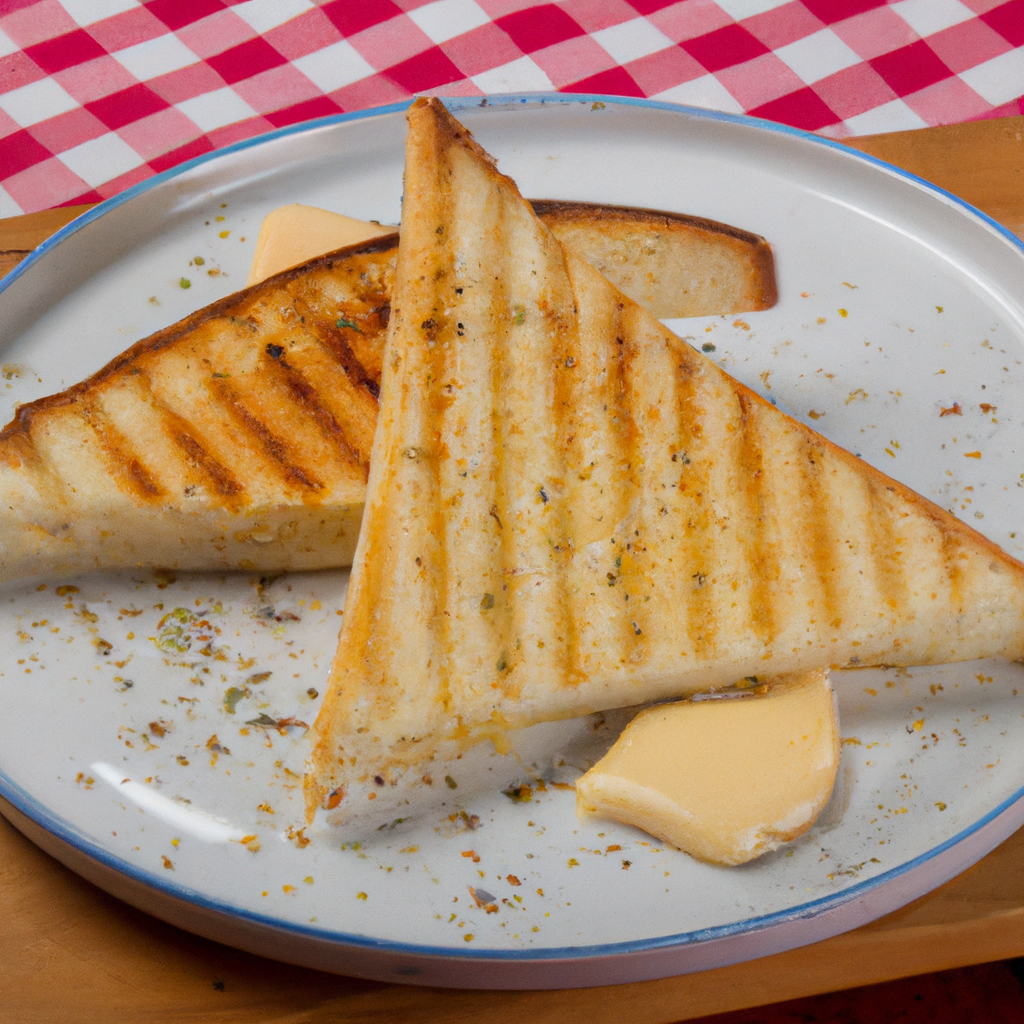

In [72]:
Image.open('image.png')

In [74]:
Complete_recipe = print(response['choices'][0]['text'])



Recipe Title: Delicious Cheese Toast

Ingredients:
- 2 slices of bread
- 2 eggs
- 2 slices of cheese
- 1 tablespoon of butter

Instructions:

1. Preheat your oven to 375°F.

2. Spread 1 tablespoon of butter onto each slice of bread.

3. Place the slices of cheese on top of the buttered bread.

4. Crack the eggs into a bowl and whisk until combined.

5. Pour the egg mixture over the slices of cheese.

6. Place the pieces of bread on a baking sheet and bake in the oven for 15 minutes.

7. Serve the cheese toast warm and enjoy!
